In [ ]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from wrangle_xml import wrangle_xml, preprocessing_xml, create_validate_xml_df

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = wrangle_xml()

In [5]:
df.head(2)

,creationDate,device,endDate,sourceName,sourceVersion,startDate,type,unit,value
0,2016-06-03 17:38:46 -0500,"<<HKDevice: 0x2825a8410>, name:iPhone, manufac...",2016-06-03 16:40:52 -0500,Noah's iPhone,9.3.1,2016-06-03 16:40:09 -0500,HKQuantityTypeIdentifierStepCount,count,70.0
1,2016-06-03 17:38:46 -0500,"<<HKDevice: 0x2825a83c0>, name:iPhone, manufac...",2016-06-03 16:58:26 -0500,Noah's iPhone,9.3.1,2016-06-03 16:57:23 -0500,HKQuantityTypeIdentifierStepCount,count,68.0


In [6]:
df = preprocessing_xml(df)

In [7]:
df.head(2)

,startDate,creationDate,device,endDate,sourceName,sourceVersion,type,unit,value
0,2016-06-03 16:40:09,2016-06-03 17:38:46,"<<HKDevice: 0x2825a8410>, name:iPhone, manufac...",2016-06-03 16:40:52,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,70.0
1,2016-06-03 16:57:23,2016-06-03 17:38:46,"<<HKDevice: 0x2825a83c0>, name:iPhone, manufac...",2016-06-03 16:58:26,Noah's iPhone,9.3.1,HKQuantityTypeIdentifierStepCount,count,68.0


In [8]:
df_validate = create_validate_xml_df()

In [9]:
df_validate.head(2)

,Date,Steps,Distance,Floors Ascended,start_value,create_value,end_value
0,2020-08-16,14656,6.7,0,14705.0,14705.0,14705.0
1,2020-08-15,10103,4.7,8,10103.0,10103.0,10103.0


In [10]:
# How many items are the same for each column?
for i in df_validate.columns[4:]:
    var = (df_validate.Steps == df_validate[i]).sum()
    print(f'{i} has {var} dates exactly the same')

start_value has 124 dates exactly the same
create_value has 93 dates exactly the same
end_value has 124 dates exactly the same


In [11]:
for i in df_validate.columns[4:]:
    var = abs(df_validate.Steps - df_validate[i]).sum()
    print(f'{i} has an absolute difference of {var} from pedometer data')

start_value has an absolute difference of 753943.0 from pedometer data
create_value has an absolute difference of 878594.0 from pedometer data
end_value has an absolute difference of 736764.0 from pedometer data


In [12]:
for i in df_validate.columns[4:]:
    var = (df_validate.Steps - df_validate[i]).sum()
    print(f'{i} has a total difference of {var} from pedometer data')

start_value has a total difference of -71843.0 from pedometer data
create_value has a total difference of -72180.0 from pedometer data
end_value has a total difference of -71826.0 from pedometer data


In [13]:
for i in df_validate.columns[4:]:
    var = (df_validate.Steps - df_validate[i]).max()
    print(f'{i} has an absolute difference of {var} from pedometer data')

start_value has an absolute difference of 21548.0 from pedometer data
create_value has an absolute difference of 21548.0 from pedometer data
end_value has an absolute difference of 21548.0 from pedometer data


In [14]:
df_validate['start_dif'] = df_validate.Steps - df_validate.start_value

In [15]:
df_validate.sort_values('start_dif')

,Date,Steps,Distance,Floors Ascended,start_value,create_value,end_value,start_dif
531,2018-10-22,5363,2.3,3,73234.0,34313.0,1645.0,-67871.0
545,2018-10-08,2896,1.1,3,65756.0,42937.0,57.0,-62860.0
556,2018-09-27,5103,2.1,0,56741.0,5797.0,179.0,-51638.0
549,2018-10-04,5215,2.2,2,39324.0,4561.0,615.0,-34109.0
534,2018-10-19,5245,2.3,3,32512.0,18505.0,435.0,-27267.0
...,...,...,...,...,...,...,...,...
525,2018-10-28,17420,8.1,7,281.0,71870.0,71870.0,17139.0
547,2018-10-06,17611,7.3,3,0.0,0.0,0.0,17611.0
540,2018-10-13,17764,7.6,5,0.0,0.0,0.0,17764.0
533,2018-10-20,18040,7.9,5,0.0,0.0,0.0,18040.0


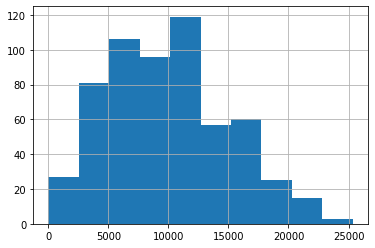

In [16]:
df_validate.Steps.hist()

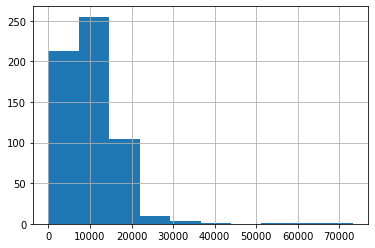

In [17]:
df_validate.start_value.hist()

In [18]:
df = df.set_index('startDate')

In [19]:
df.resample("D").value.sum().sort_values()

startDate
2018-10-24        0.000000
2018-09-29        0.000000
2018-09-30        0.000000
2018-10-01        0.000000
2018-10-06        0.000000
                  ...     
2018-10-19    32526.649745
2018-10-04    39340.326998
2018-09-27    56764.630502
2018-10-08    65784.717293
2018-10-22    73267.383074
Name: value, Length: 1538, dtype: float64

In [27]:
def create_distance_df(df):
    """function creates dataframe for distance travelled (in miles)"""
    
    # filter only miles records
    df_distance = df[df.unit == "mi"]
    
    # resample to date in days
    df_distance = df_distance.resample("D").value.sum().sort_values()
    
    return df_distance

In [28]:
df_distance = create_distance_df(df)

In [30]:
df_distance

startDate
2018-10-14     0.000000
2018-10-30     0.000000
2018-10-27     0.000000
2018-10-26     0.000000
2018-10-25     0.000000
                ...    
2018-11-10    15.053501
2018-10-04    16.326998
2018-09-27    23.630502
2018-10-08    28.717293
2018-10-22    33.383074
Name: value, Length: 1538, dtype: float64

In [24]:
df_validate.Distance.agg(['min', 'max'])

min     0.0
max    11.7
Name: Distance, dtype: float64

In [ ]:
df_validate[df_validate.Distance < .5]

In [ ]:
df_validate[(df_validate.start_value >= 24639) |  (df_validate.end_value >= 24639) | (df_validate.create_value >= 24639)]

In [ ]:
df_validate.mean()

### Look at the hourly breakdown of steps to find out where data is bad

In [86]:
def create_hourly(df): 
    """create df for steps per hour that will have 0 steps for non movement hours and will then fix bad data"""
    
    # filter by step count
    df_steps = df[df.type == 'HKQuantityTypeIdentifierStepCount']
    
    # resample df into hourly
    hourly = pd.DataFrame(df_steps.resample("h").value.sum())
    
    return hourly

In [33]:
hourly

,value
startDate,
2016-06-03 16:00:00,138.0
2016-06-03 17:00:00,140.0
2016-06-03 18:00:00,160.0
2016-06-03 19:00:00,0.0
2016-06-03 20:00:00,13.0
...,...
2020-08-18 16:00:00,110.0
2020-08-18 17:00:00,38.0
2020-08-18 18:00:00,111.0


In [91]:
def create_every_hour():
    """takes in a dataframe and returns a dataframe with every hour accounted for"""
    
    # create a series with every hour within the date range
    date_index = pd.date_range(start='2016-06-04 00:00:00', end='2020-08-14 00:00:00', freq='h')
    
    # turn the date range into a data frame
    date_index = pd.DataFrame(date_index)
    
    # make an extra column for df
    date_index['zero_column'] = 0
    
    # rename columns to make better looking df
    date_index = date_index.rename(columns={0:'date'})
    
    # set index
    date_index.set_index('date', inplace=True)
    
    # create hourly df
    hourly = create_hourly_steps(df)
    
    # join hourly df to create df with zeros for hours with no activity
    date_index = date_index.join(hourly)
    
    #set hourly df
    hourly = date_index
    
    hourly.drop(columns=('zero_column'), inplace=True)
    
    return hourly

In [92]:
hourly = create_every_hour()

In [93]:
hourly

,value
date,
2016-06-04 00:00:00,0.0
2016-06-04 01:00:00,0.0
2016-06-04 02:00:00,0.0
2016-06-04 03:00:00,0.0
2016-06-04 04:00:00,0.0
...,...
2020-08-13 20:00:00,74.0
2020-08-13 21:00:00,117.0
2020-08-13 22:00:00,17.0


In [94]:
print("These are the outliers")
hourly.value.nlargest(11)

These are the outliers


date
2018-10-22 16:00:00    71589.0
2018-10-08 07:00:00    65756.0
2018-09-27 09:00:00    56614.0
2018-10-04 11:00:00    39099.0
2018-10-19 14:00:00    32309.0
2018-11-10 09:00:00    30485.0
2018-10-29 05:00:00    29373.0
2018-11-12 19:00:00    18525.0
2018-10-16 13:00:00    17002.0
2018-11-06 13:00:00    15795.0
2018-11-03 17:00:00    15757.0
Name: value, dtype: float64

In [ ]:
df_miles = df[df.unit == 'mi']

In [ ]:
miles = pd.DataFrame(df_miles.resample("h").value.sum())

In [ ]:
miles.value.nlargest(11)

In [ ]:
df.value.nlargest(11)

In [ ]:
df.sort_values("index")

In [ ]:
steps = df[df.type == 'HKQuantityTypeIdentifierStepCount'].reset_index().sort_values('startDate')

In [ ]:
steps['next_record'] = steps.startDate.shift(-1) - steps.startDate

In [ ]:
steps.next_record.nlargest(11)

In [ ]:
distance = df[df.type == 'HKQuantityTypeIdentifierDistanceWalkingRunning'].reset_index().sort_values('startDate')

In [ ]:
distance.head()

In [ ]:
steps.head()

In [ ]:
steps[(steps.startDate > "2018-09-27 00:00:00") & (steps.startDate < "2018-11-13 00:00:00")]

In [ ]:
steps.sort_values('value', ascending=False)

In [ ]:
hourly['hour'] = hourly.index.hour

In [ ]:
hourly

In [ ]:
hourly['new_value'] = hourly.value.apply(lambda x: 1000 if x > 10000 else x)

In [ ]:
hourly.value.mean()

In [ ]:
hourly.new_value.mean()

In [ ]:
hourly.groupby('hour').new_value.sum().plot.bar()

In [ ]:
hourly.groupby('hour').new_value.mean().plot.bar()

In [ ]:
hourly.groupby('hour').new_value.median().plot.bar()

In [ ]:
median_percentage = pd.DataFrame(hourly.groupby('hour').new_value.median())

In [ ]:
median_percentage['percentage'] = median_percentage / median_percentage.sum()

In [ ]:
df.next_record